In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.express as px
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


import warnings
import os
import random

In [3]:
import warnings
from google.colab import files
uploaded = files.upload()


Saving cancer.csv to cancer.csv


In [24]:
df = pd.read_csv('cancer.csv')
print(df.head())
print(df.tail())
print(df.describe())

   index  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0   33       1              2            4             5   
1      1   17       1              3            1             5   
2      2   35       1              4            5             6   
3      3   37       1              7            7             7   
4      4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4                    2         2   
1 

In [25]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [26]:
# Assuming the column is named 'risk_level'
df['Level'] = df['Level'].replace({'Low': 0, 'Medium': 1, 'High': 2})

# Display the updated dataset
print(df.head())

   index  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0   33       1              2            4             5   
1      1   17       1              3            1             5   
2      2   35       1              4            5             6   
3      3   37       1              7            7             7   
4      4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4                    2         2   
1 

In [27]:
# Replace 'price' with your target column
X = df.drop('Level', axis=1)
y = df['Level']


In [34]:
# Encode categorical variables if needed (e.g., one-hot encoding)
X = pd.get_dummies(X)

# Convert categorical data to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])

In [35]:
categorical_columns = ['Level']

# Apply label encoding to each categorical column

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [28]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [36]:
# Create and fit a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Display the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_val}")
print("Confusion Matrix:")
print(conf_matrix_val)
print("Classification Report:")
print(classification_report_val)

Validation Set Metrics:
Accuracy: 0.9133333333333333
Confusion Matrix:
[[38  9  1]
 [ 1 47  2]
 [ 0  0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        48
           1       0.84      0.94      0.89        50
           2       0.95      1.00      0.97        52

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



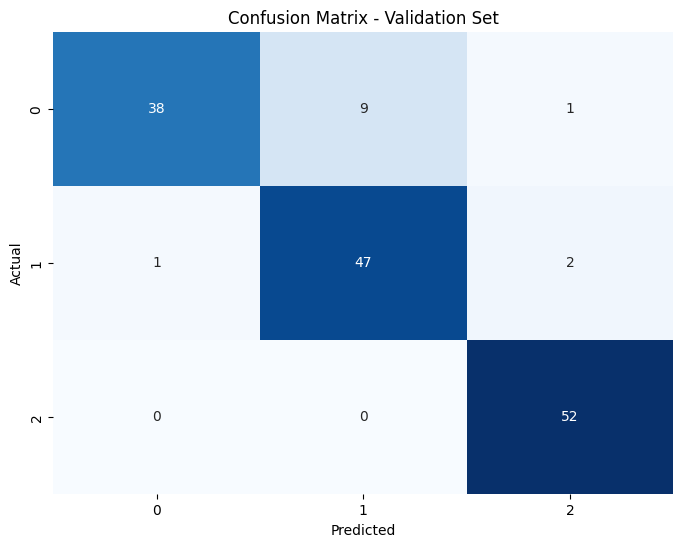

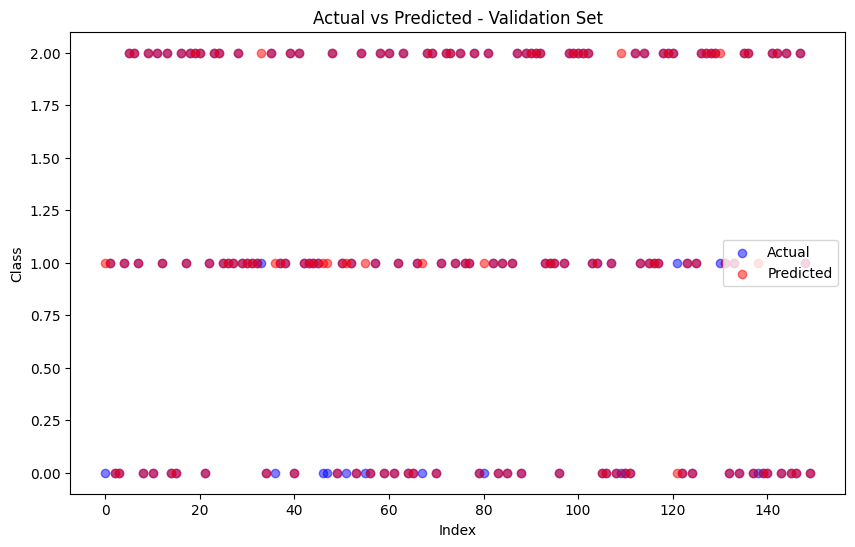

In [38]:
# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_val_pred)), y_val_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Validation Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

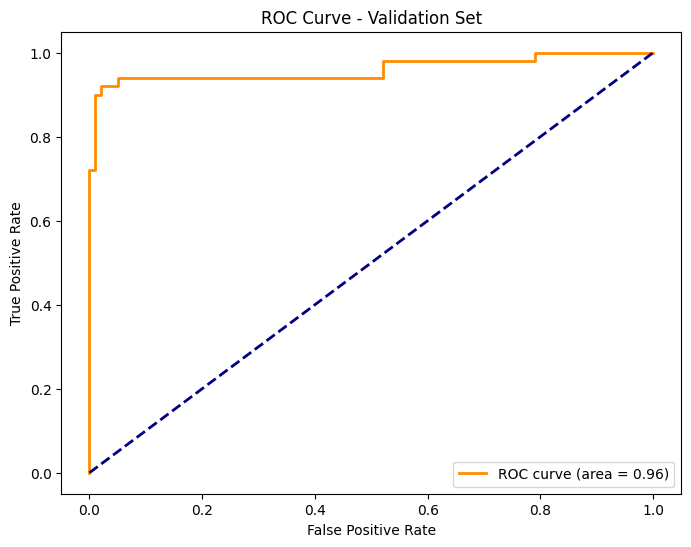

In [39]:
# Calculate the probability scores for the positive class (class 1) for the validation set
y_val_scores = model.predict_proba(X_val)[:, 1]

# Calculate the ROC curve for the validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_scores,pos_label = 1 )
roc_auc_val = auc(fpr_val, tpr_val)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Display the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Classification Report:")
print(classification_report_test)


Test Set Metrics:
Accuracy: 0.9133333333333333
Confusion Matrix:
[[28  6  2]
 [ 3 43  1]
 [ 1  0 66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.88      0.91      0.90        47
           2       0.96      0.99      0.97        67

    accuracy                           0.91       150
   macro avg       0.90      0.89      0.90       150
weighted avg       0.91      0.91      0.91       150



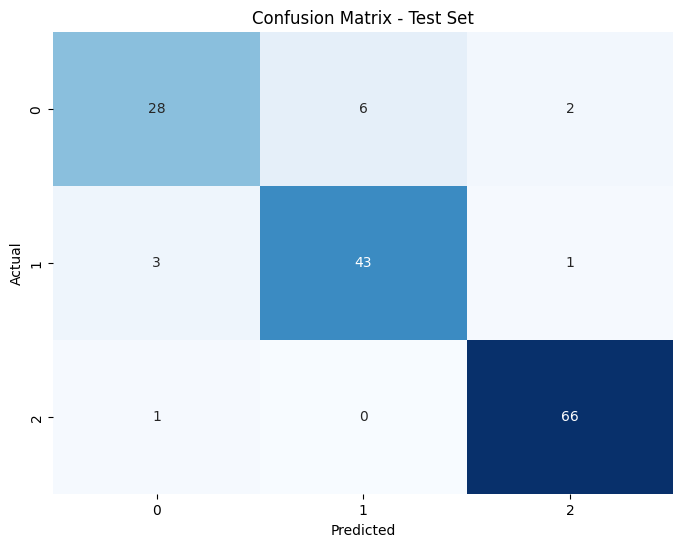

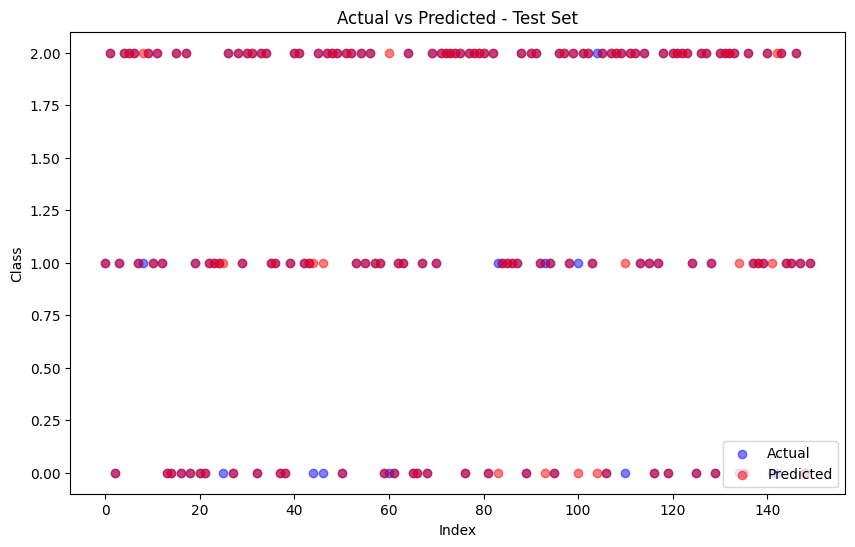

In [41]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

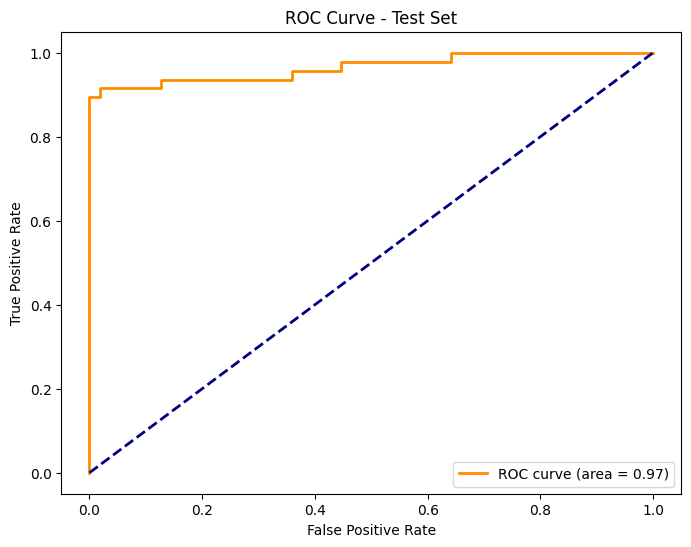

In [43]:
# Calculate the probability scores for the positive class (class 1) for the test set
y_test_scores = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores,pos_label = 1)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

In [44]:
# Create and fit a Gaussian Naive Bayes model on the training set
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)


In [45]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Display the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Classification Report:")
print(classification_report_test)


Test Set Metrics:
Accuracy: 0.9133333333333333
Confusion Matrix:
[[28  6  2]
 [ 3 43  1]
 [ 1  0 66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.88      0.91      0.90        47
           2       0.96      0.99      0.97        67

    accuracy                           0.91       150
   macro avg       0.90      0.89      0.90       150
weighted avg       0.91      0.91      0.91       150



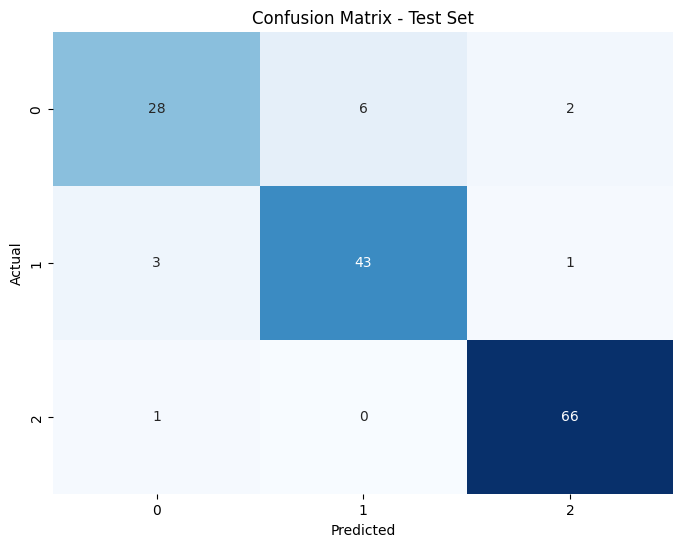

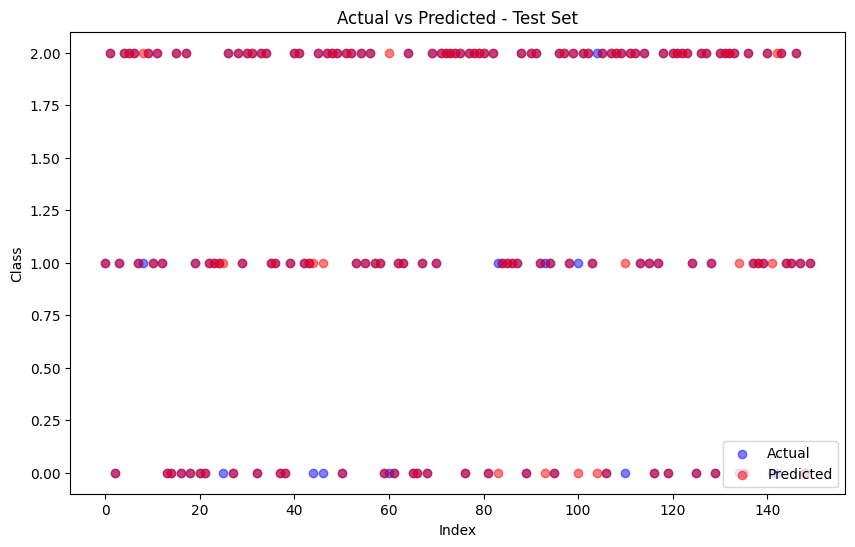

In [46]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

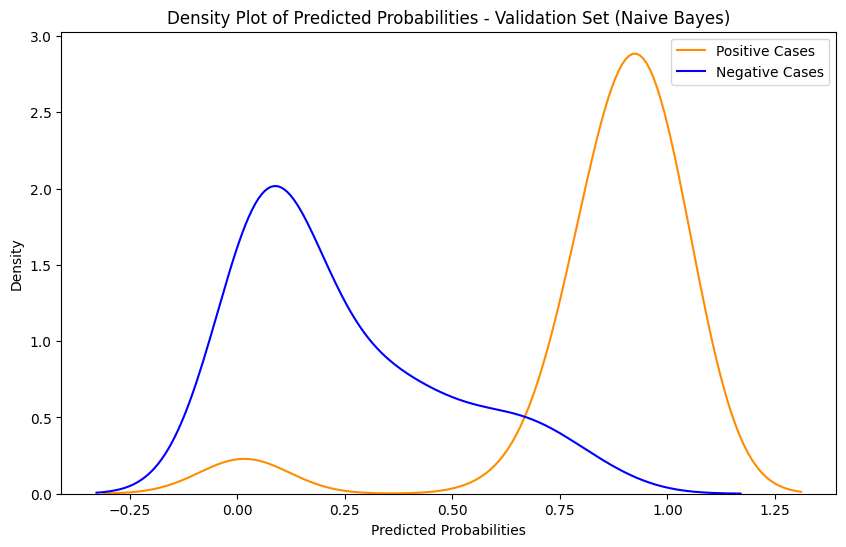

In [47]:
# Create a DataFrame to combine true labels and predicted probabilities for the validation set
validation_results = pd.DataFrame({'True Labels': y_val, 'Predicted Probabilities': y_val_scores})

# Create density plots for positive and negative cases
plt.figure(figsize=(10, 6))

# Density plot for positive cases
sns.kdeplot(validation_results.loc[(validation_results['True Labels'] == 1), 'Predicted Probabilities'],
            color='darkorange', label='Positive Cases')

# Density plot for negative cases
sns.kdeplot(validation_results.loc[(validation_results['True Labels'] == 0), 'Predicted Probabilities'],
            color='blue', label='Negative Cases')

plt.title('Density Plot of Predicted Probabilities - Validation Set (Naive Bayes)')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()

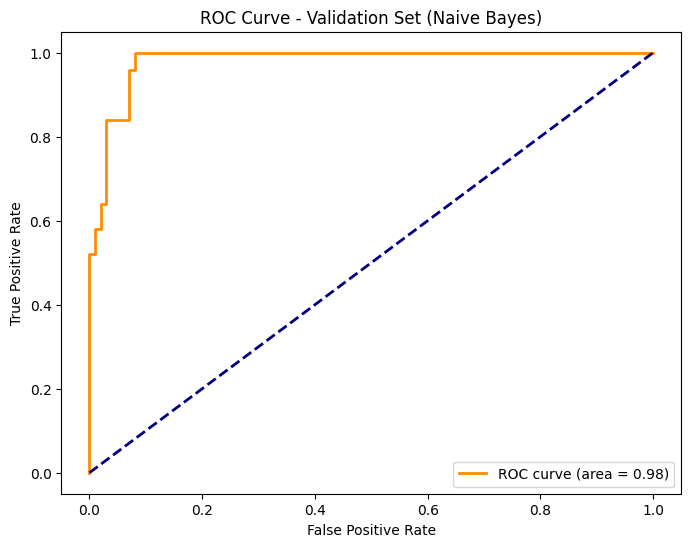

In [49]:
# Calculate the probability scores for the positive class (class 1) for the validation set
y_val_scores = model.predict_proba(X_val)[:, 1]

# Calculate the ROC curve for the validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_scores,pos_label = 1)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

In [51]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the probability scores for the positive class (class 1) for the test set
y_test_scores = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores,pos_label = 1)
roc_auc_test = auc(fpr_test, tpr_test)



In [52]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Display the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Classification Report:")
print(classification_report_test)


Test Set Metrics:
Accuracy: 0.88
Confusion Matrix:
[[30  4  2]
 [ 0 39  8]
 [ 0  4 63]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.83      0.83      0.83        47
           2       0.86      0.94      0.90        67

    accuracy                           0.88       150
   macro avg       0.90      0.87      0.88       150
weighted avg       0.89      0.88      0.88       150



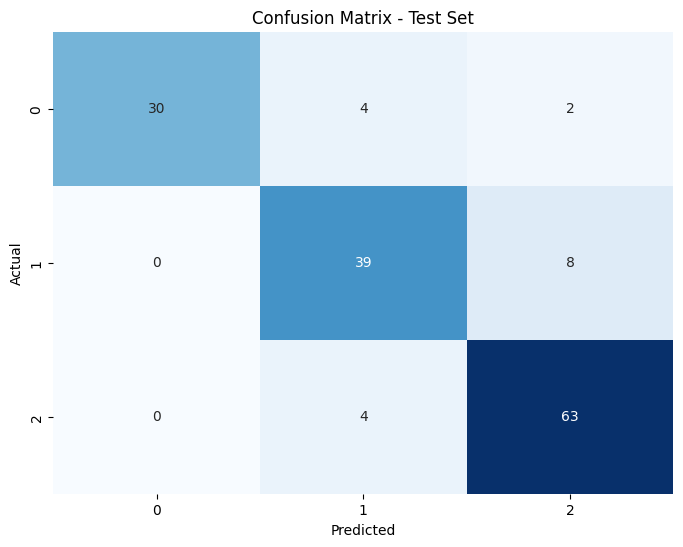

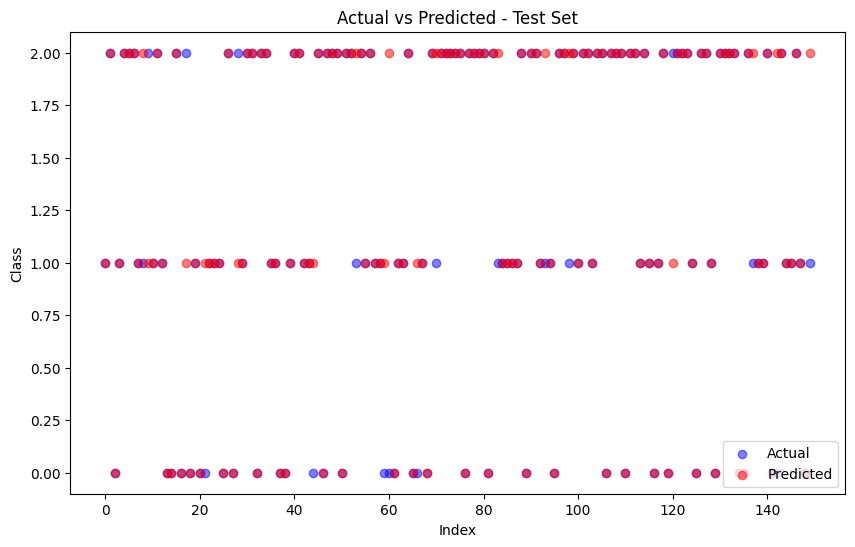

In [54]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

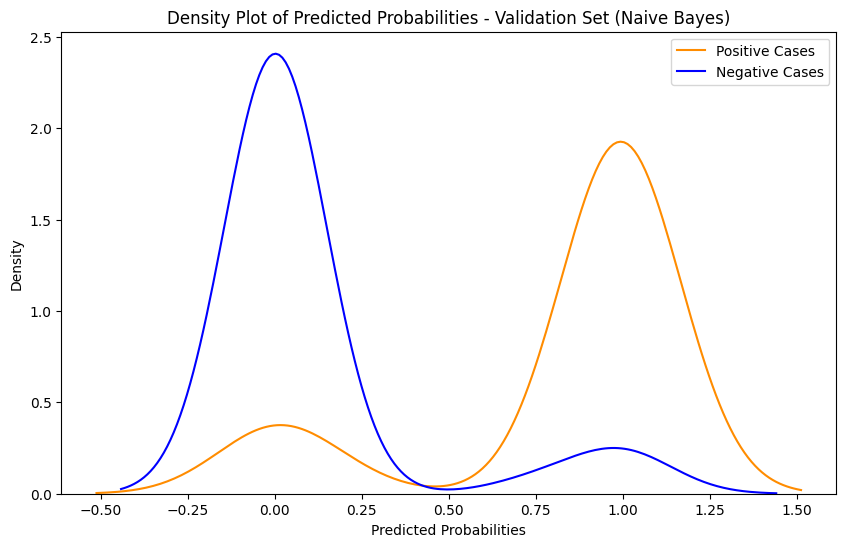

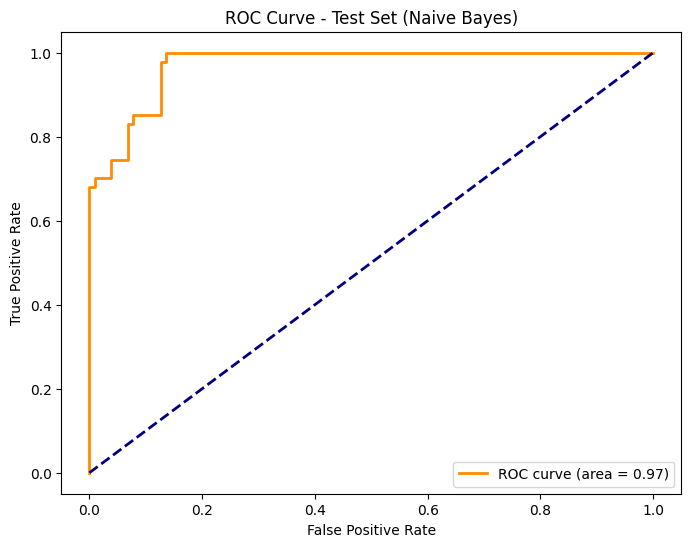

In [53]:
# Create a DataFrame to combine true labels and predicted probabilities for the validation set
test_results = pd.DataFrame({'True Labels': y_test, 'Predicted Probabilities': y_test_scores})

# Create density plots for positive and negative cases
plt.figure(figsize=(10, 6))

# Density plot for positive cases
sns.kdeplot(test_results.loc[(test_results['True Labels'] == 1), 'Predicted Probabilities'],
            color='darkorange', label='Positive Cases')

# Density plot for negative cases
sns.kdeplot(test_results.loc[(test_results['True Labels'] == 0), 'Predicted Probabilities'],
            color='blue', label='Negative Cases')

plt.title('Density Plot of Predicted Probabilities - Validation Set (Naive Bayes)')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()


# Plot the ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()



In [57]:
# Create and fit a Random Forest model on the training set
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Display the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_val}")
print("Confusion Matrix:")
print(conf_matrix_val)


Validation Set Metrics:
Accuracy: 1.0
Confusion Matrix:
[[48  0  0]
 [ 0 50  0]
 [ 0  0 52]]


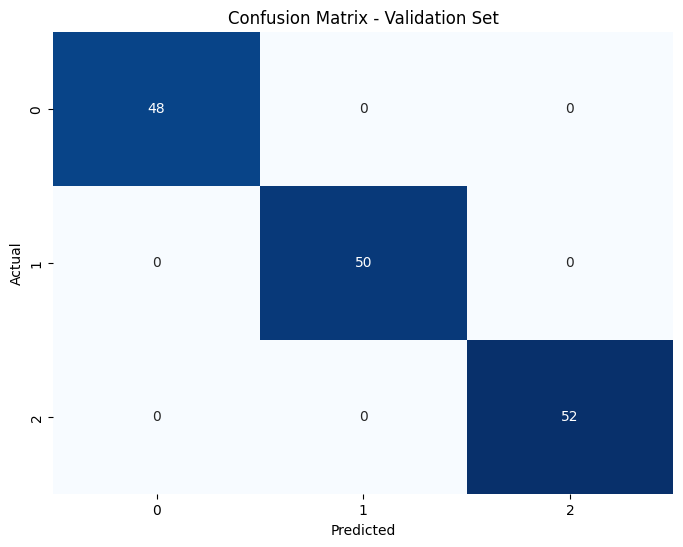

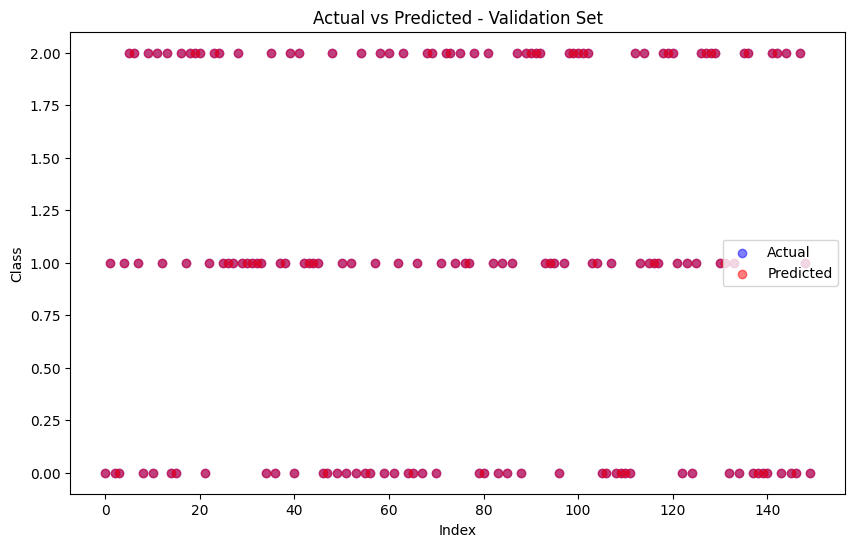

In [59]:
# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_val_pred)), y_val_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Validation Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

In [60]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix_test)



Test Set Metrics:
Accuracy: 1.0
Confusion Matrix:
[[36  0  0]
 [ 0 47  0]
 [ 0  0 67]]


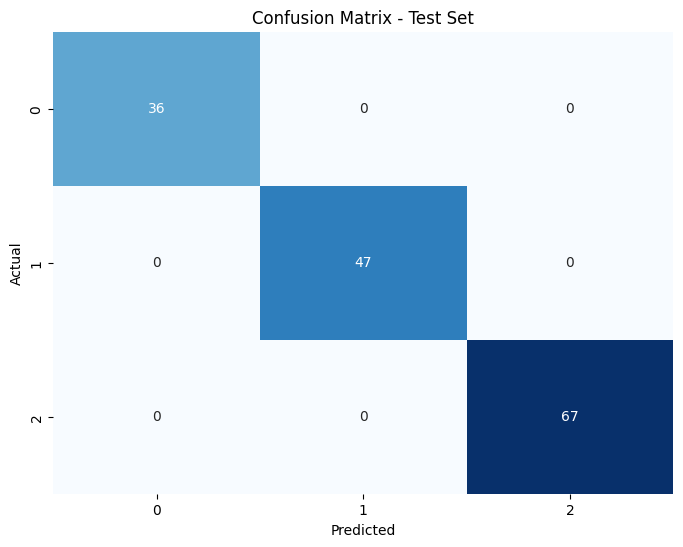

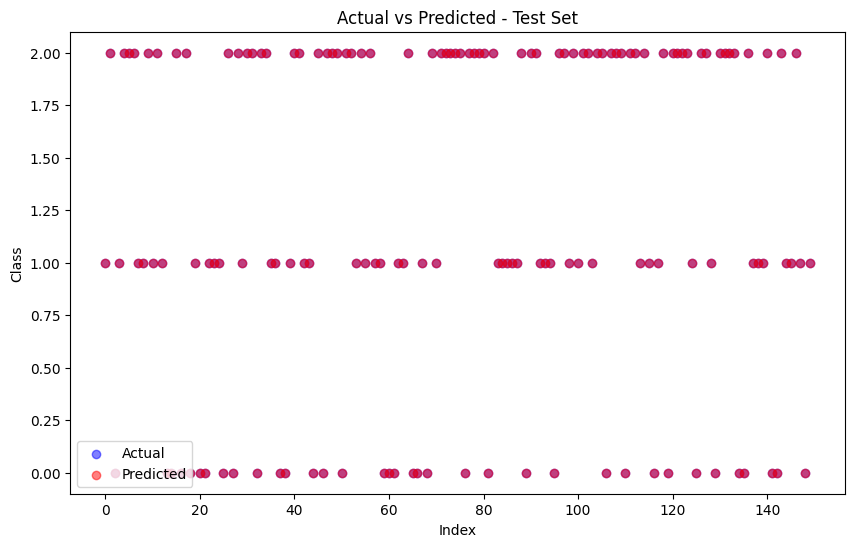

In [61]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

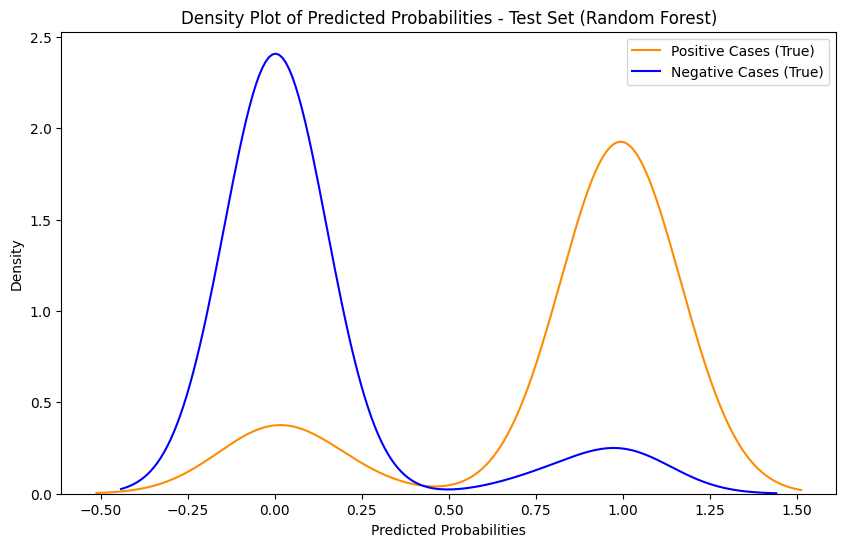

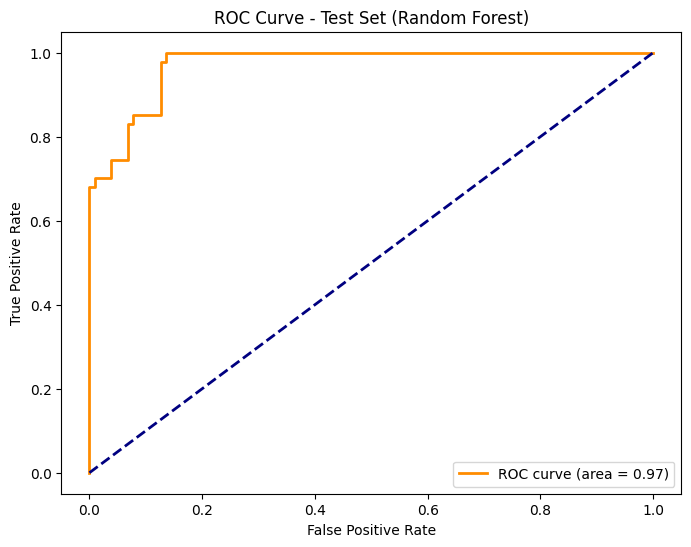

In [63]:
# Create a DataFrame to combine true labels and predicted probabilities for the test set
test_results = pd.DataFrame({'True Labels': y_test, 'Predicted Probabilities': y_test_scores})

# Create density plots for positive and negative cases
plt.figure(figsize=(10, 6))

# Density plot for positive cases
sns.kdeplot(test_results.loc[(test_results['True Labels'] == 1), 'Predicted Probabilities'],
            color='darkorange', label='Positive Cases (True)')

# Density plot for negative cases
sns.kdeplot(test_results.loc[(test_results['True Labels'] == 0), 'Predicted Probabilities'],
            color='blue', label='Negative Cases (True)')

plt.title('Density Plot of Predicted Probabilities - Test Set (Random Forest)')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate the ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores,pos_label =1)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [65]:
# Create and fit an SVM model on the training set
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the probability scores for the positive class (class 1) for the validation set
y_val_scores = model.predict_proba(X_val)[:, 1]


In [68]:
# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Display the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_val}")
print("Confusion Matrix:")
print(conf_matrix_val)


Validation Set Metrics:
Accuracy: 0.32666666666666666
Confusion Matrix:
[[18 14 16]
 [23 18  9]
 [22 17 13]]


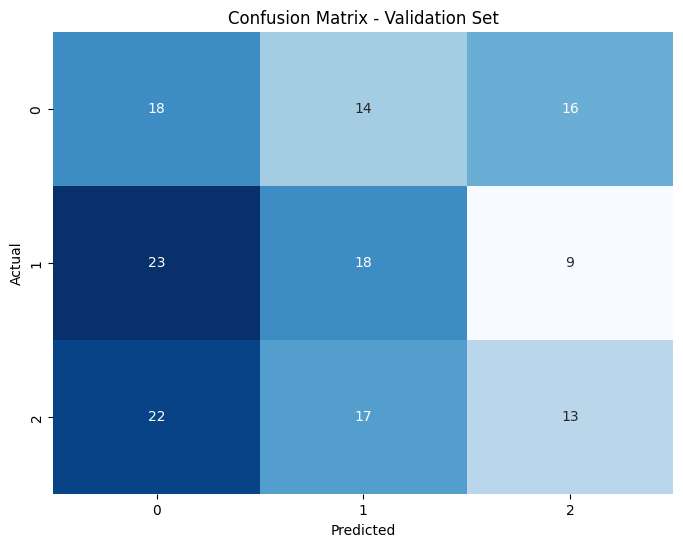

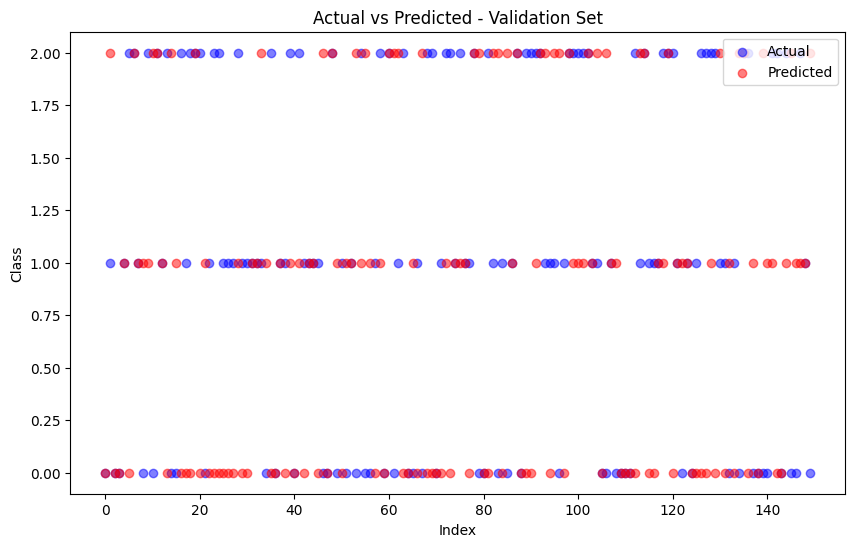

In [69]:
# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_val_pred)), y_val_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Validation Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

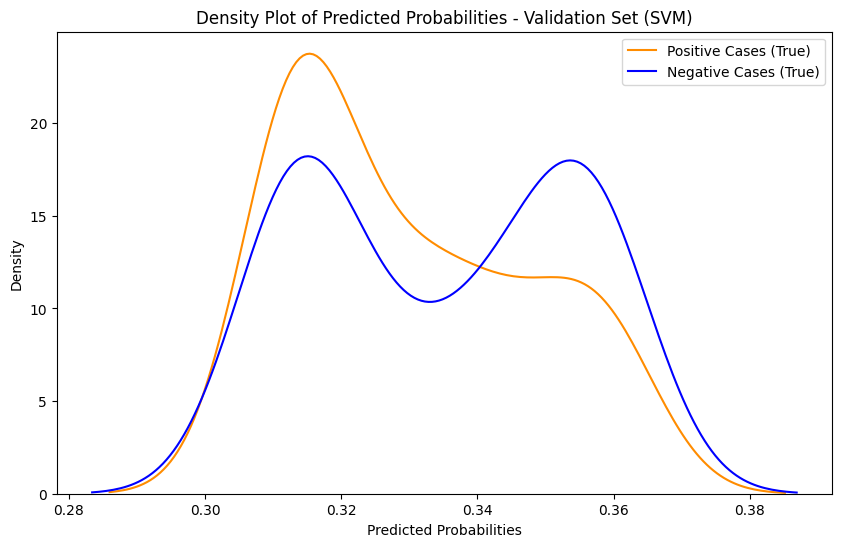

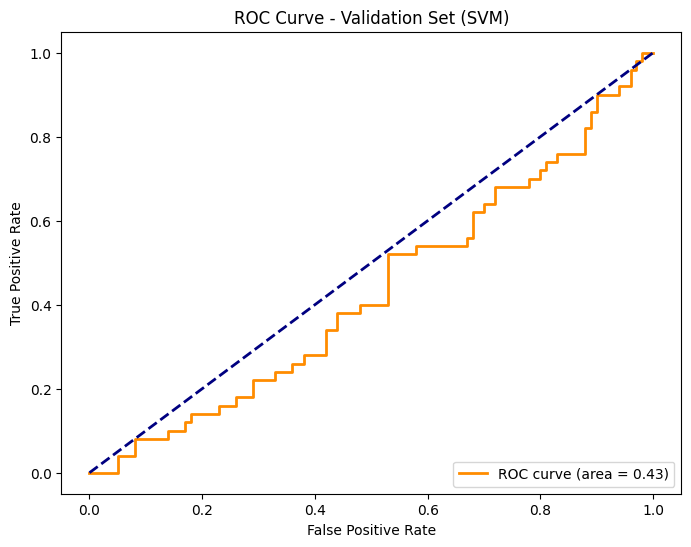

In [67]:
# Create a DataFrame to combine true labels and predicted probabilities for the validation set
validation_results = pd.DataFrame({'True Labels': y_val, 'Predicted Probabilities': y_val_scores})

# Create density plots for positive and negative cases
plt.figure(figsize=(10, 6))

# Density plot for positive cases
sns.kdeplot(validation_results.loc[(validation_results['True Labels'] == 1), 'Predicted Probabilities'],
            color='darkorange', label='Positive Cases (True)')

# Density plot for negative cases
sns.kdeplot(validation_results.loc[(validation_results['True Labels'] == 0), 'Predicted Probabilities'],
            color='blue', label='Negative Cases (True)')

plt.title('Density Plot of Predicted Probabilities - Validation Set (SVM)')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate the ROC curve for the validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_scores,pos_label =1)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (SVM)')
plt.legend(loc='lower right')
plt.show()


In [70]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the probability scores for the positive class (class 1) for the test set
y_test_scores = model.predict_proba(X_test)[:, 1]

# Create a DataFrame to combine true labels and predicted probabilities for the test set
test_results = pd.DataFrame({'True Labels': y_test, 'Predicted Probabilities': y_test_scores})


In [71]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix_test)



Test Set Metrics:
Accuracy: 0.38
Confusion Matrix:
[[18  7 11]
 [23 18  6]
 [31 15 21]]


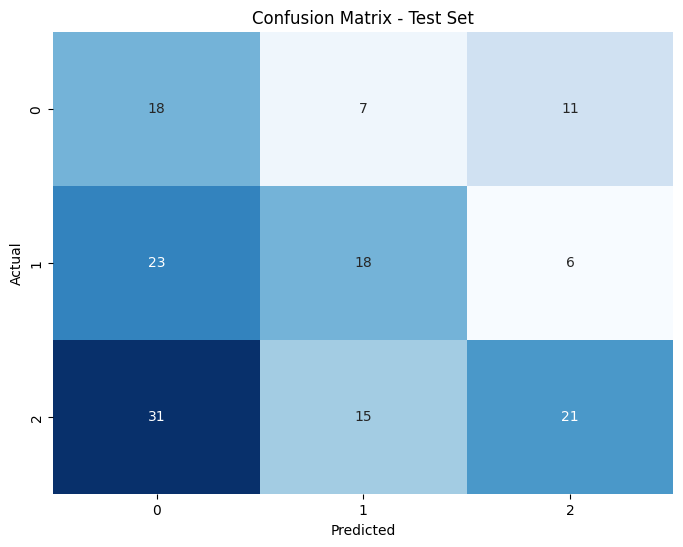

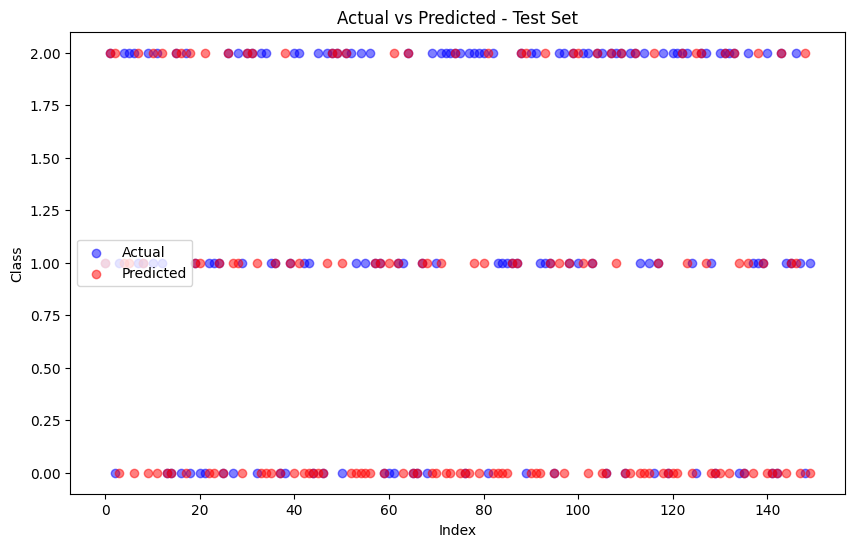

In [72]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

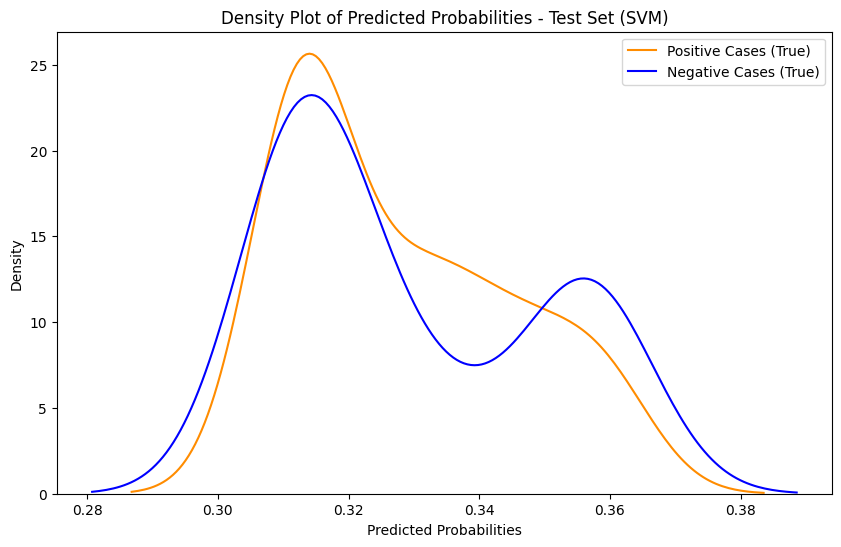

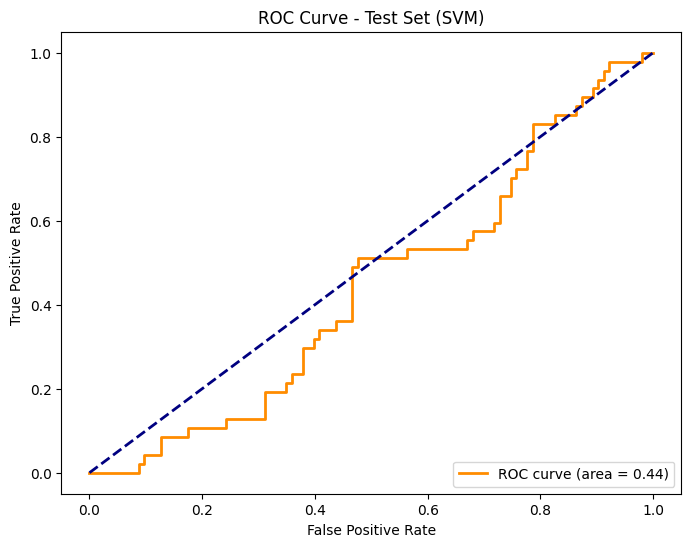

In [75]:
# Create density plots for positive and negative cases
plt.figure(figsize=(10, 6))

# Density plot for positive cases
sns.kdeplot(test_results.loc[(test_results['True Labels'] == 1), 'Predicted Probabilities'],
            color='darkorange', label='Positive Cases (True)')

# Density plot for negative cases
sns.kdeplot(test_results.loc[(test_results['True Labels'] == 0), 'Predicted Probabilities'],
            color='blue', label='Negative Cases (True)')

plt.title('Density Plot of Predicted Probabilities - Test Set (SVM)')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate the ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores,pos_label =1)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set (SVM)')
plt.legend(loc='lower right')
plt.show()